<a href="https://colab.research.google.com/github/anteneh83/A2SV_Compititive_Programming/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student_burnout_dataset (1).csv to student_burnout_dataset (1).csv


Uploads files from the local system to Google Colab using the `files.upload()` function. The selected files are stored in the `uploaded` dictionary for further use.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student_burnout_dataset (1).csv")

# Preview
df.head()

,study_hours,sleep_hours,screen_time,total_score,burnout_level
0,5.993428,9.099033,4.649643,86.591124,Mild
1,4.723471,8.386951,5.710963,73.445616,Mild
2,6.295377,7.089446,4.415160,87.502651,Mild
3,8.046060,6.029595,5.384077,109.278856,NaN
4,4.531693,8.047335,2.212771,83.910832,Mild


Imports the `pandas` library and loads the dataset from the "student_burnout_dataset (1).csv" file into a DataFrame. The `df.head()` function is used to display the first few rows of the dataset.


In [12]:
# Check for missing values
df.isnull().sum()

,0
study_hours,0
sleep_hours,0
screen_time,0
total_score,0
burnout_level,232


Checks for missing values in the dataset by using `isnull()` to identify missing entries, and `sum()` calculates the total number of missing values in each column.


In [24]:
X = df[['study_hours', 'sleep_hours', 'screen_time']]

# Targets
y_class = df['burnout_level'] # For classification
y_reg = df['total_score'] #fro regression

Selects the features `study_hours`, `sleep_hours`, and `screen_time` as the input variables (X). The target variable for classification is `burnout_level` (y_class), and for regression, it is `total_score` (y_reg).


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical 'burnout_level' into numeric labels
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)


Encodes the categorical `burnout_level` variable into numeric labels using `LabelEncoder`. The encoded labels are stored in `y_class_encoded`.


In [15]:
from sklearn.model_selection import train_test_split

# Split for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class_encoded, test_size=0.2, random_state=42)

# Split for regression
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)


Splits the data into training and testing sets for both classification and regression tasks. For classification, it uses `y_class_encoded` as the target, and for regression, it uses `y_reg`. The test size is set to 20%, with a fixed random seed for reproducibility.


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Classification Model - Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_c, y_train_c)

RandomForestClassifier(random_state=42)

Creates and trains a Random Forest Classifier model using the training data (`X_train_c` and `y_train_c`) for classification. The `random_state` is set for reproducibility.


In [18]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Predictions and Evaluation for Classification
y_pred_c = classifier.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Classification Model - Accuracy: {accuracy}")


Classification Model - Accuracy: 0.805


Makes predictions using the classification model on the test data (`X_test_c`) and evaluates the model's performance by calculating the accuracy score. The result is printed to show the classification model's accuracy.


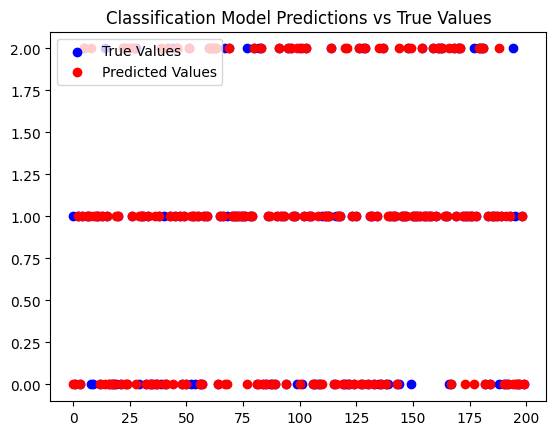

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize classification results
plt.scatter(range(len(y_test_c)), y_test_c, color='blue', label='True Values')
plt.scatter(range(len(y_pred_c)), y_pred_c, color='red', label='Predicted Values')
plt.legend()
plt.title('Classification Model Predictions vs True Values')
plt.show()

Visualizes the true and predicted values for the classification model by plotting them as scatter plots. True values are shown in blue, and predicted values are in red. A legend and title are added to the plot for clarity.


In [20]:
from sklearn.linear_model import LinearRegression

# Regression Model - Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_r, y_train_r)

LinearRegression()

Creates and trains a Linear Regression model using the training data (`X_train_r` and `y_train_r`) for regression.


In [21]:
# Predictions and Evaluation for Regression
y_pred_r = regressor.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
print(f"Regression Model - Mean Squared Error: {mse}")

Regression Model - Mean Squared Error: 26.895413782929907


Makes predictions using the regression model on the test data (`X_test_r`) and evaluates the model's performance by calculating the Mean Squared Error (MSE). The result is printed to show the regression model's MSE.


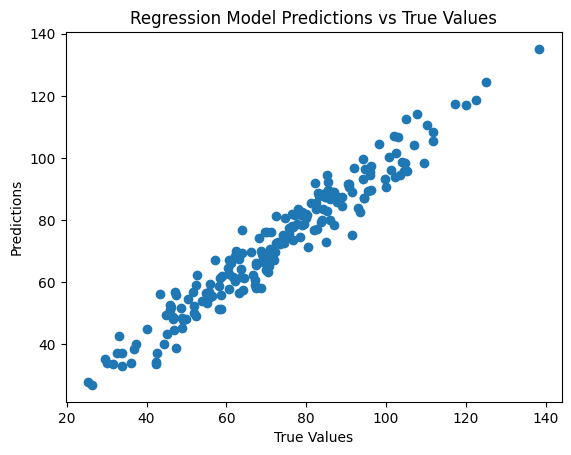

In [23]:
plt.scatter(y_test_r, y_pred_r)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Model Predictions vs True Values')
plt.show()

Visualizes the true values and predicted values for the regression model by plotting them as a scatter plot. The x-axis represents true values, and the y-axis represents predictions. A title and labels are added to the plot for clarity.
